In [1]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk

from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from collections import defaultdict
from wordcloud import WordCloud

nltk.download("stopwords")


/tmp/ipykernel_12315/1536425942.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
[nltk_data] Downloading package stopwords to /home/pc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import Data

In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()


(48665, 2)


,rate,text
0,4,Очень понравилось. Были в начале марта с соба...
1,5,В целом магазин устраивает.\nАссортимент позво...
2,5,"Очень хорошо что открылась 5 ка, теперь не над..."
3,3,Пятёрочка громко объявила о том как она заботи...
4,3,"Тесно, вечная сутолока, между рядами трудно ра..."


In [3]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()


(12167, 1)


,text
0,Очень хороший магазин и сотрудники приятный
1,"Самый обычный продуктовый магазин. Есть сыры,..."
2,Всё хорошо и комфортно
3,"Маленький филиальчик, все необходимое есть. Дв..."
4,Плохо относятся к клиентам!!!!!\n


## Target Distributions

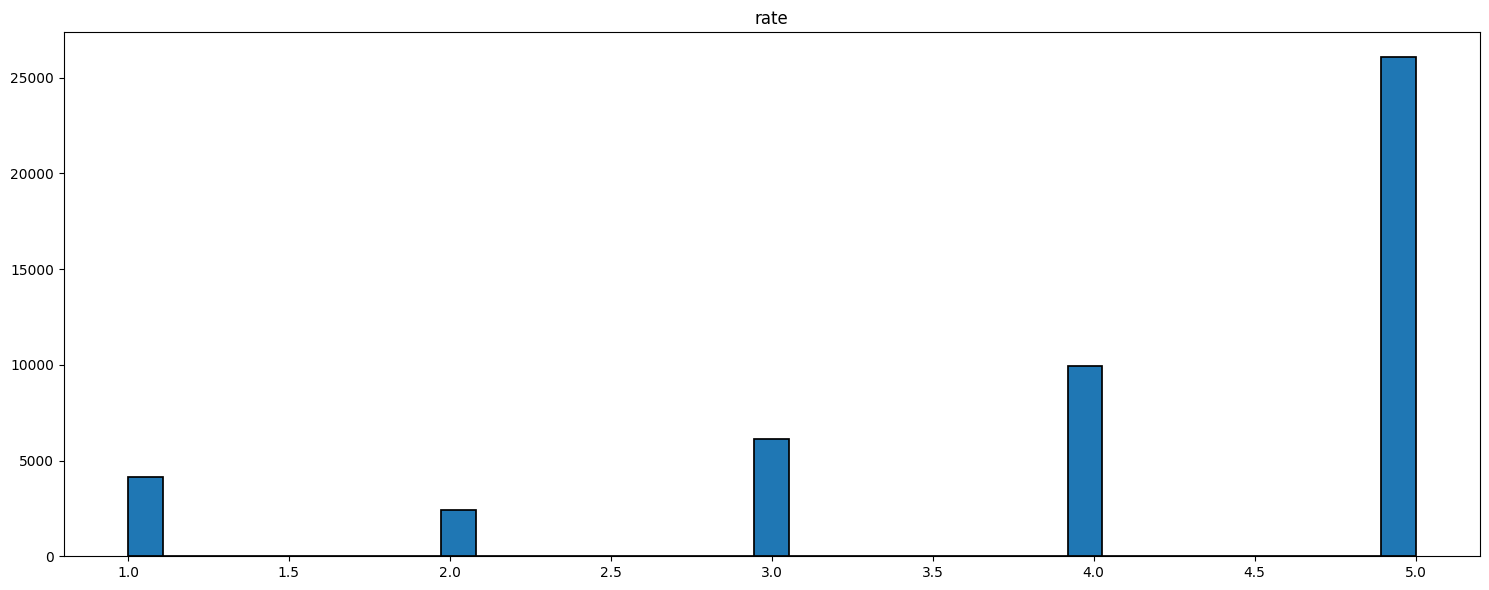

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(15, 6))

sns.histplot(x="rate", data=train, linewidth=1.25,
             alpha=1, ax=axes, zorder=2)
axes.set_title("rate")
axes.set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()


### (As a percentage)

In [5]:
print(train.rate.value_counts(normalize=True))


5    0.535683
4    0.203884
3    0.125881
1    0.085030
2    0.049522
Name: rate, dtype: float64


## Number words

In [6]:
print("Number words in train dataset: ", len(
    " ".join(train.text.tolist()).split()))
print("Number words in test dataset: ", len(
    " ".join(test.text.tolist()).split()))


Number words in train dataset:  879144
Number words in test dataset:  219365


## Vocabulary size

In [7]:
vocab_size = len(set(" ".join(train.text.tolist()).split(
) + " ".join(test.text.tolist()).split()))
print("Vocabulary size: ", vocab_size)


Vocabulary size:  118642


## Movie Description Example

In [8]:
def print_texts(df):
    inner_html = ""
    for idx, row in df.iterrows():
        inner_html += f"""
        <td style="vertical-align:top; border-right: 1px solid #7accd8">
        <hr>
            <dl>
                <dt> Rate </dt>
                <dd>{row.rate}</dd>
            </dl>
            
            <hr>
            <p>
            {row.text}
            </p>
        </td>
        """
    display(HTML(f"""
    <table style="font-family: monospace;">
        <tr>
             {inner_html}
        </tr>
    </table>
    """))


In [9]:
rate_1 = train[train.rate == 1].head(2)
print_texts(rate_1)


"Rate 1 Цена на кассе вечно не соответствует цене в зале. Будьте внимательны, обходите стороной.",Rate 1 Отвратительная пятёрочка .....товара на полках мало ассортимент не очень


In [10]:
rate_5 = train[train.rate == 5].head(2)
print_texts(rate_5)


"Rate 5 В целом магазин устраивает. Ассортимент позволяет не ходить в другие магазины и все покупать здесь,рядом с домом. Часто акции .Сроки годности соответствуют.Кассиры доброжелательны.Правда в последний год количество их уменьшилось в разы,часто работает 1 касса,очереди. В магазине чисто,часто размораживают и моют холодильники. Но также часто заходишь на недели и нет каких то ходовых товаров- курица,творог и т.д","Rate 5 Очень хорошо что открылась 5 ка, теперь не надо далеко ехать все рядом!"


## Text Analysis

### Number of Characters

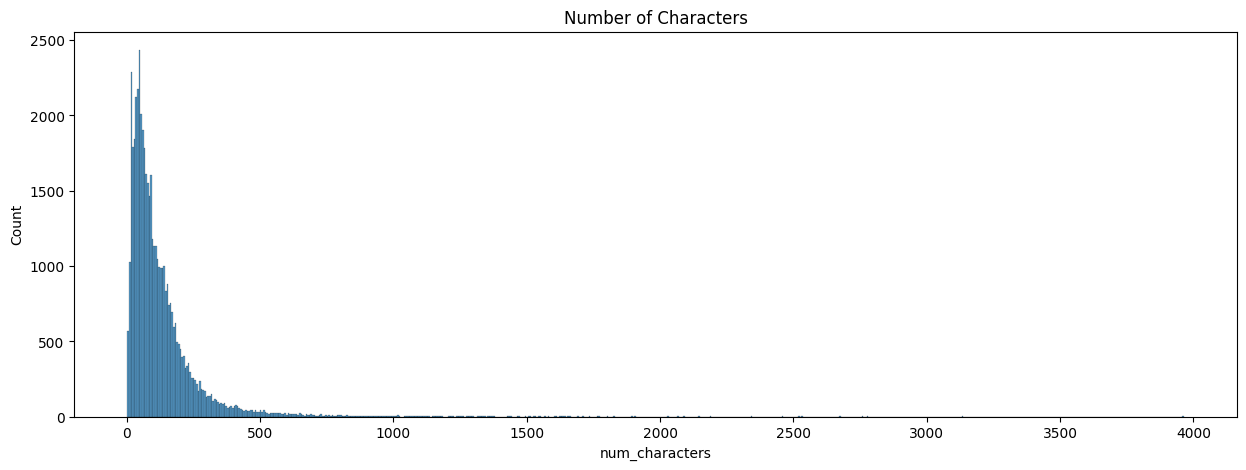

In [11]:
fig = plt.figure(figsize=(15, 5))
train["num_characters"] = train["text"].str.len()

sns.histplot(data=train, x="num_characters")
plt.title("Number of Characters")
plt.show()


In [12]:
fig = px.histogram(
    train,
    x=train["text"].str.len(),
    marginal="box",
    title="Number of Characters",
    color_discrete_sequence=["#FFA200"]
)
fig.update_layout(bargap=0.2)
fig.update_layout(template="plotly_dark", font=dict(
    family="PT Sans", size=18, color="#C4FEFF"))
fig.show()


### Number of Words

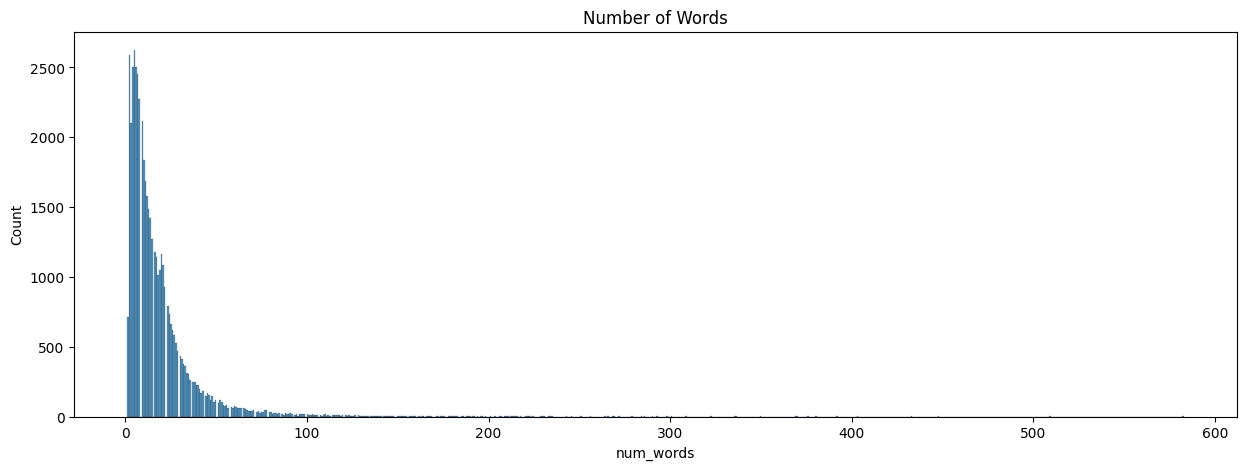

In [13]:
fig = plt.figure(figsize=(15, 5))
train["num_words"] = train["text"].apply(
    lambda x: len(str(x).split()))
sns.histplot(data=train, x="num_words")
plt.title("Number of Words")
plt.show()


In [14]:
fig = px.histogram(
    train,
    x=train["num_words"],
    marginal="box",
    title="Number of Words",
    color_discrete_sequence=["#FFA200"]
)
fig.update_layout(bargap=0.2)
fig.update_layout(template="plotly_dark", font=dict(
    family="PT Sans", size=18, color="#C4FEFF"))
fig.show()


In [15]:
train["num_words"].describe()


count    48665.000000
mean        18.065221
std         21.474285
min          1.000000
25%          6.000000
50%         12.000000
75%         22.000000
max        583.000000
Name: num_words, dtype: float64

### Common Stopwords

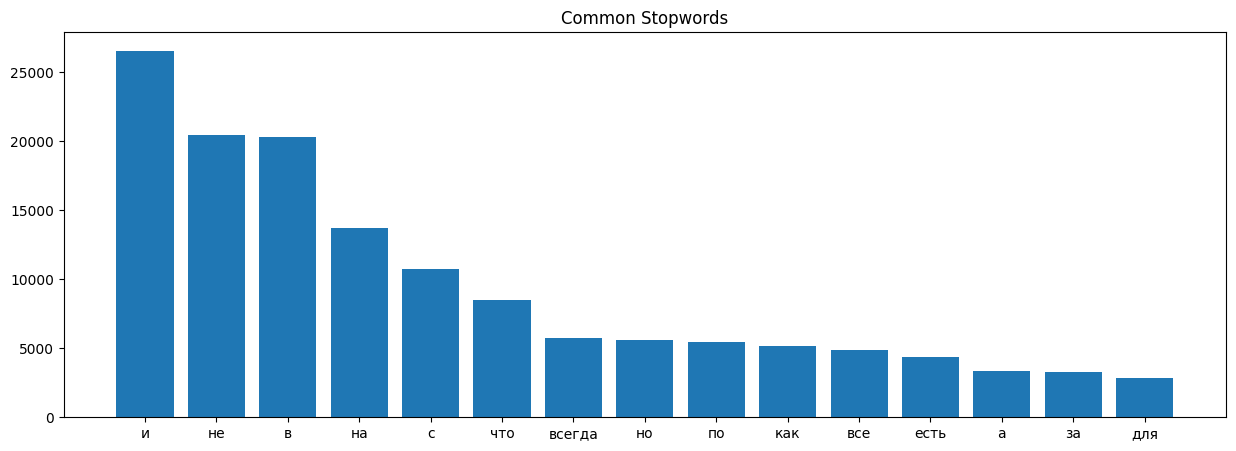

In [16]:
fig = plt.figure(figsize=(15, 5))

stop_words = set(stopwords.words("russian"))
corpus = "".join(map(str, train.text)).split()

dic = defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word] += 1
top_words = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
x, y = zip(*top_words)
plt.bar(x, y)
plt.title("Common Stopwords")
plt.show()


### Word Cloud

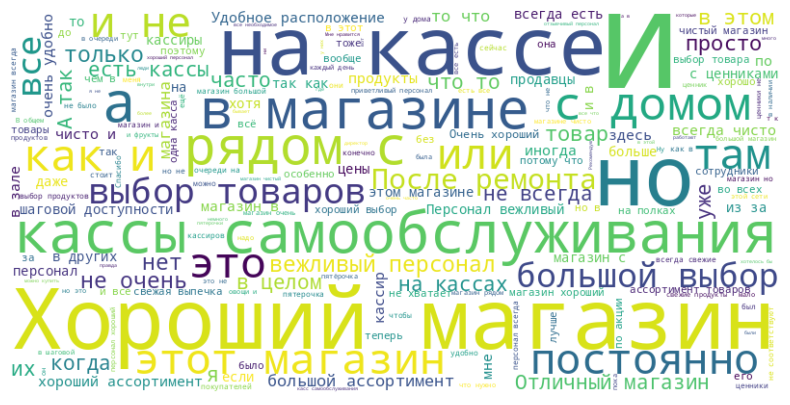

In [17]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    "".join(map(str, train.text)))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
